In [ ]:
# 화재 발생 구별, 연도별 데이터 이용


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('data-files1/fire_place_1.txt', sep='\t', encoding='utf-8')
data1 = data1.replace('-','0')

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   기간             78 non-null     int64 
 1   자치구            78 non-null     object
 2   합계             78 non-null     object
 3   단독주택           78 non-null     object
 4   공동주택           78 non-null     object
 5   기타주택           78 non-null     object
 6   학교             78 non-null     object
 7   일반업무           78 non-null     object
 8   판매시설           78 non-null     object
 9   숙박시설           78 non-null     object
 10  종교시설           78 non-null     object
 11  의료시설           78 non-null     object
 12  공장 및 창고        78 non-null     object
 13  작업장            78 non-null     object
 14  위락오락시설         78 non-null     object
 15  음식점            78 non-null     int64 
 16  일반서비스시설        78 non-null     int64 
 17  기타             78 non-null     int64 
 18  운송(차량 철도 등)    78 non-null     i

In [4]:
data1.set_index('자치구', inplace =True) # 인덱스 '자치구'로 설정
data1=data1.drop('합계')     # 합계 제거
data1=data1.astype(np.int64)

In [5]:
# data1['주택'] = data1['단독주택'].astype(int) + data1['공동주택'].astype(int) + data1['기타주택'].astype(int)
data1['주택'] = data1['단독주택'] + data1['공동주택'] + data1['기타주택']
data1['기타장소'] = data1['기타'] + data1['기타.1']
data1 = data1.drop(['단독주택', '공동주택', '기타주택', '기타', '기타.1'], axis=1)
# data1.head(2)

In [6]:
data2=data1.reset_index()     # 인덱스 '자치구' 설정 해제
print(list(data1.columns))      # 컬럼 리스트

['기간', '합계', '학교', '일반업무', '판매시설', '숙박시설', '종교시설', '의료시설', '공장 및 창고', '작업장', '위락오락시설', '음식점', '일반서비스시설', '운송(차량 철도 등)', '임야', '위험물(가스 제조소 등)', '주택', '기타장소']


In [7]:
data2=data2[['기간', '자치구', '주택' ,'학교', '일반업무', '판매시설', '숙박시설', '종교시설', '의료시설',
             '공장 및 창고', '작업장', '위락오락시설', '음식점', '일반서비스시설', '운송(차량 철도 등)', 
             '임야', '위험물(가스 제조소 등)','기타장소','합계']]     #컬럼 위치 변경

In [8]:
data2.rename(columns={"기간":"연도", "합계":"소계"}, inplace = True)  # 컬럼 rename 설정
data2.head(3)

,연도,자치구,주택,학교,일반업무,판매시설,숙박시설,종교시설,의료시설,공장 및 창고,작업장,위락오락시설,음식점,일반서비스시설,운송(차량 철도 등),임야,위험물(가스 제조소 등),기타장소,소계
0,2016,종로구,81,4,13,9,2,0,0,5,12,2,45,24,16,1,0,62,276
1,2016,중구,34,3,28,11,2,0,1,6,19,1,28,5,18,0,0,54,210
2,2016,용산구,69,2,14,11,4,1,1,5,2,1,32,7,19,0,0,29,197


In [ ]:
data2.pivot_table(index='연도', columns='자치구', values='소계', aggfunc='sum')

In [110]:
연도별df=data2.groupby('연도').sum()  #연도별 각 컬럼 총 합
구별df=data2.groupby('자치구').sum() # 2016~2018 각 컬럼 총 합
data2.groupby('자치구').describe()['주택']
# 연도별df.describe()['주택']
# 연도별df.describe()
# 연도별df.loc[2016].describe()
# 연도별df.loc[2017].describe()
# 연도별df.loc[2018].describe()

,count,mean,std,min,25%,50%,75%,max
자치구,,,,,,,,
강남구,3.0,153.666667,28.041636,123.0,141.5,160.0,169.0,178.0
강동구,3.0,135.666667,11.015141,123.0,132.0,141.0,142.0,143.0
강북구,3.0,99.666667,9.504385,90.0,95.0,100.0,104.5,109.0
강서구,3.0,173.333333,26.839026,143.0,163.0,183.0,188.5,194.0
관악구,3.0,153.333333,24.704925,127.0,142.0,157.0,166.5,176.0
광진구,3.0,101.000000,7.810250,96.0,96.5,97.0,103.5,110.0
구로구,3.0,120.000000,8.888194,113.0,115.0,117.0,123.5,130.0
금천구,3.0,83.666667,6.027714,78.0,80.5,83.0,86.5,90.0
노원구,3.0,124.333333,31.659648,91.0,109.5,128.0,141.0,154.0


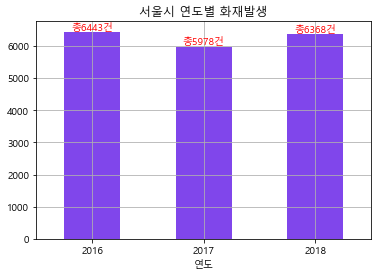

In [54]:
plt.rc('font', family="Malgun Gothic")

연도별df['소계'].plot(kind='bar',grid=True, color='#8046eb' ,title = '서울시 연도별 화재발생' )
plt.xticks(rotation=360)

for x, y in enumerate(list(연도별df["소계"])):
    txt="총%d건" % y
    plt.text(x, y, txt, fontsize=10, color='red',horizontalalignment='center', verticalalignment='bottom')
plt.show()

In [10]:
구별총합=data2['소계'].groupby(data2['자치구']).sum().sort_values(ascending=False) #2016~2018 구별 총 합 & 정렬
구별평균=data2['소계'].groupby(data2['자치구']).mean() #2016~2018 구별 평균

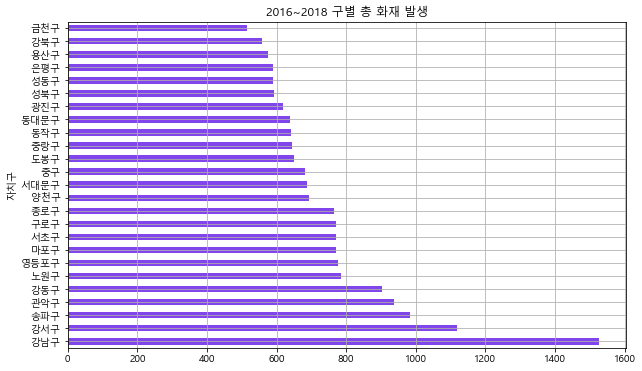

In [55]:
구별총합.plot(kind='barh',grid=True, color='#8046eb', figsize=(10,6),title = '2016~2018 구별 총 화재 발생' )
plt.show()

In [11]:
# 연도별 분리
year16=data2[data2['연도']==2016]   
year17=data2[data2['연도']==2017]
year18=data2[data2['연도']==2018]

In [12]:
data2.groupby('연도').mean()

,주택,학교,일반업무,판매시설,숙박시설,종교시설,의료시설,공장 및 창고,작업장,위락오락시설,음식점,일반서비스시설,운송(차량 철도 등),임야,위험물(가스 제조소 등),기타장소,소계
연도,,,,,,,,,,,,,,,,,
2016,105.08,1.92,17.88,8.16,1.48,1.64,1.6,3.36,4.76,2.64,29.40,11.16,19.24,2.28,0.00,47.12,257.72
2017,102.28,1.56,16.44,6.40,1.32,1.56,1.8,3.84,4.48,2.04,27.24,10.20,18.72,2.28,0.08,38.88,239.12
2018,110.56,1.20,17.52,8.28,2.52,1.92,2.0,2.96,4.44,2.60,27.28,11.76,16.64,1.36,0.08,43.60,254.72


In [82]:
# year16['소계'].groupby(year16['자치구']).sum().sort_values(ascending=False).\
# plot(kind='barh',grid=True, color='#8046eb', figsize=(10,5), title='2016년 구별 총 화재 발생')
# plt.show()
y16=year16.sort_values(by=["자치구","소계"] ,ascending=True)  #소계 기준 내림차순 정렬
y17=year17.sort_values(by=["자치구","소계"] ,ascending=True)
y18=year18.sort_values(by=["자치구","소계"] ,ascending=True)

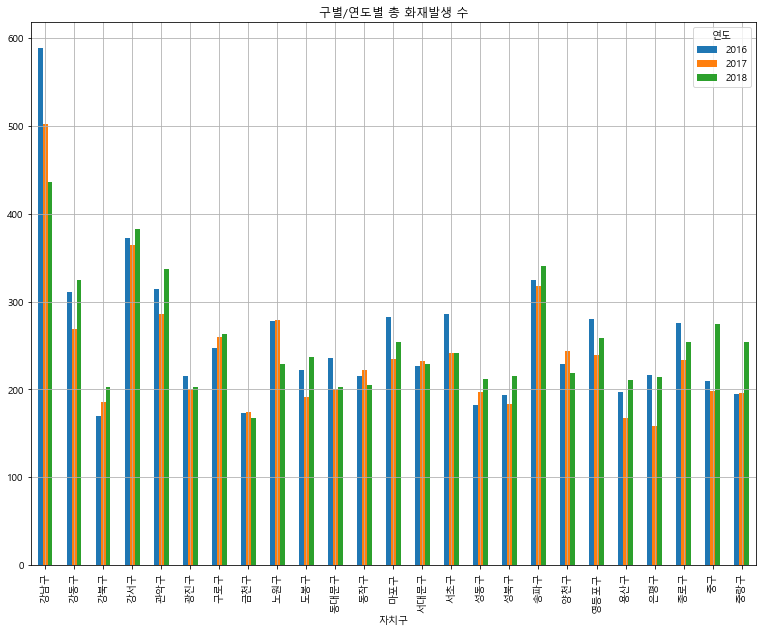

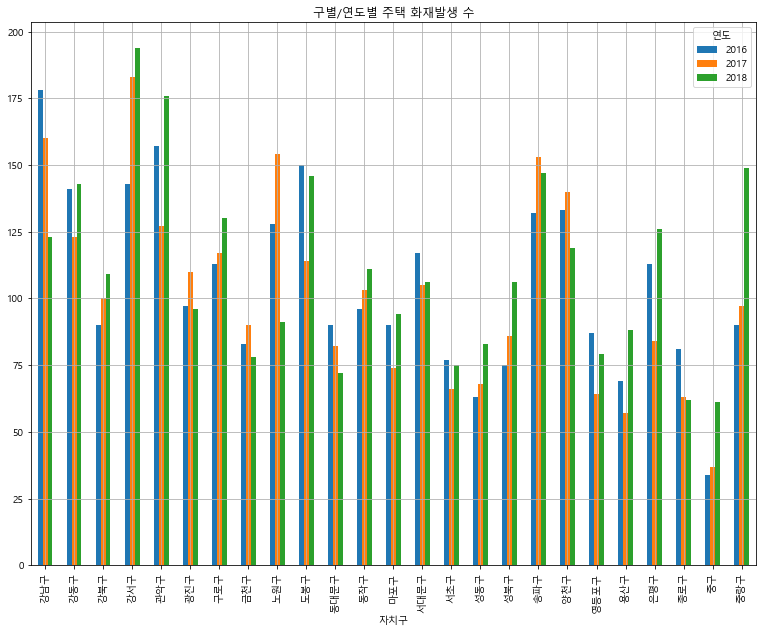

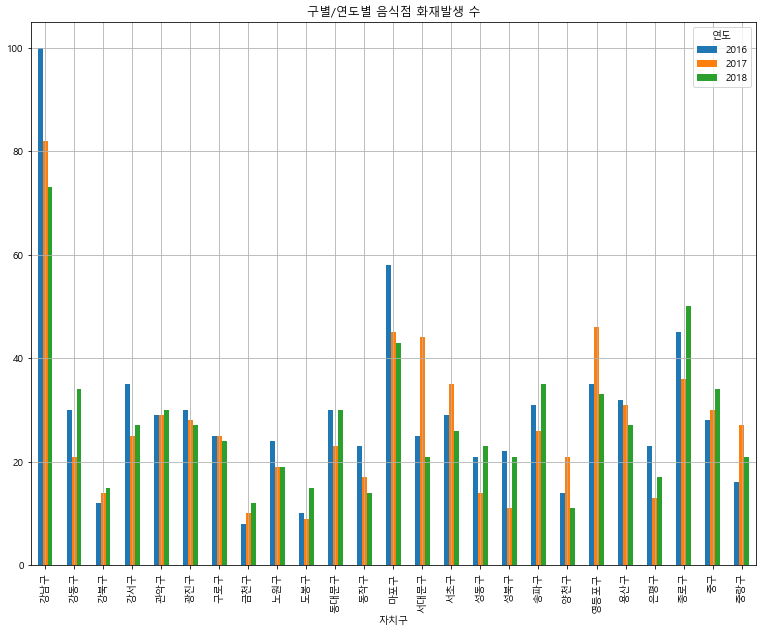

In [56]:
data2["연도"].unique()
data2['자치구'].unique()

city_df=data2.loc[:, ['연도','자치구','소계']]
ci = city_df.groupby(['자치구','연도'])['소계'].sum().unstack()
ci.plot(kind='bar', grid=True, figsize=(13,10) ,title="구별/연도별 총 화재발생 수" )
plt.show()

city_df1=data2.loc[:, ['연도','자치구','주택']]
ci_1 = city_df1.groupby(['자치구','연도'])['주택'].sum().unstack()
ci_1.plot(kind='bar',grid=True, figsize=(13,10) ,title="구별/연도별 주택 화재발생 수" )
plt.show()

city_df12=data2.loc[:, ['연도','자치구','음식점']]
ci_12 = city_df12.groupby(['자치구','연도'])['음식점'].sum().unstack()
ci_12.plot(kind='bar',grid=True, figsize=(13,10) ,title="구별/연도별 음식점 화재발생 수" )
plt.show()

In [99]:
# 연도별, 구별 가장 많이 발생한 장소
datax = []

for year in data2["연도"].unique():
    data_by_year = data2[data2["연도"] == year]
    for gu in data_by_year["자치구"].unique():
        data_by_gu = data_by_year[data_by_year["자치구"] == gu]
        data_by_gu = data_by_gu.iloc[:, 2:-1]
        datax.append([year, gu, data_by_gu.columns[np.argmax(data_by_gu.values)], np.max(data_by_gu.values)])
datax
data3=pd.DataFrame(datax, columns=["연도", "자치구", "발생장소", "건수"])
data3
# data3[data3['자치구']=='강남구']

,연도,자치구,발생장소,건수
0,2016,종로구,주택,81
1,2016,중구,기타장소,54
2,2016,용산구,주택,69
3,2016,성동구,주택,63
4,2016,광진구,주택,97
...,...,...,...,...
70,2018,관악구,주택,176
71,2018,서초구,주택,75
72,2018,강남구,주택,123
73,2018,송파구,주택,147


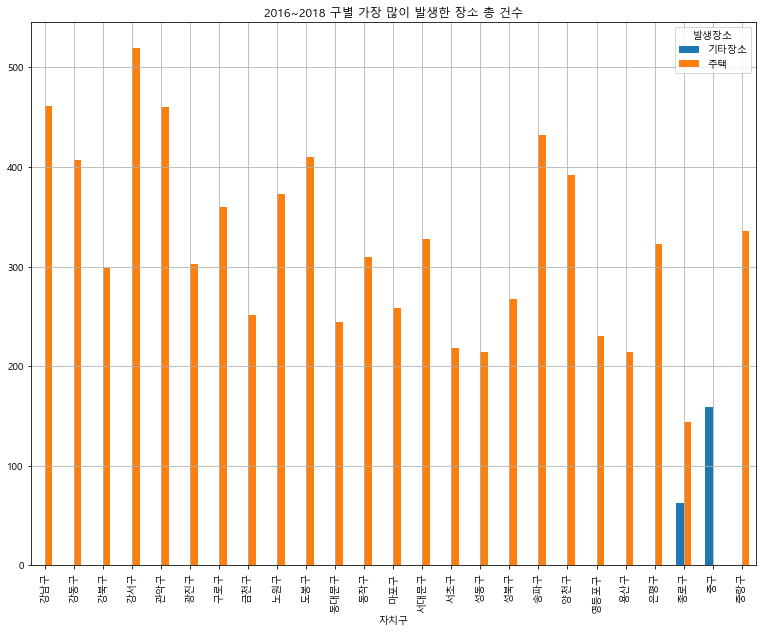

In [83]:
city_df3=data3.loc[:, ['연도','자치구','발생장소','건수']]
ci3 = city_df3.groupby(['자치구','발생장소'])['건수'].sum().unstack()
ci3.plot(kind='bar', grid=True, figsize=(13,10) ,title="2016~2018 구별 가장 많이 발생한 장소 총 건수" )
plt.show()
# 연도별 분리
ye16=data3[data3['연도']==2016].sort_values(by='건수',ascending=True) 
ye17=data3[data3['연도']==2017].sort_values(by='건수',ascending=True)
ye18=data3[data3['연도']==2018].sort_values(by='건수',ascending=True) 
# ye16
# ye17
# ye18.head()

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
city_df=data2.loc[:, ['연도','자치구','소계']]
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      75 non-null     int64 
 1   자치구     75 non-null     object
 2   소계      75 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ KB


In [16]:
fp1 = pd.read_csv('data-files1/fire_protection.txt',sep='\t', encoding='utf-8' )
fp1 = fp1.replace('-','0')

In [17]:
# fp1["계1"] = fp1["계"].map(lambda x: int(x.replace(",", "")))  # 뒤에 추가 되는 데이터
fp1["소화전"] = fp1["소화전"].map(lambda x: int(x.replace(",", ""))) # 데이터에 덮어 씀
fp1["비상소화장치"] = fp1["비상소화장치"].map(lambda x: int(x.replace(",", ""))) # 데이터에 덮어 씀
# fp1["계"] = fp1["계"].map(lambda x: int(x.replace(",", ""))) 
fp1["급수탑"] = fp1["급수탑"].map(lambda x: int(x.replace(",", "")))

In [18]:
fp1.head()
fp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      78 non-null     int64 
 1   자치구     78 non-null     object
 2   계       78 non-null     object
 3   소화전     78 non-null     int64 
 4   저수조     78 non-null     int64 
 5   급수탑     78 non-null     int64 
 6   비상소화장치  78 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 4.4+ KB


In [19]:
fp1.set_index('자치구',inplace=True)
fp1=fp1.drop('계')
fp1=fp1.drop(['계'], axis=1).reset_index() 

In [24]:
fp1['소계'] = fp1[['소화전', '저수조', '급수탑','비상소화장치']].sum(axis=1)
fp1.head()

,연도,자치구,소화전,저수조,급수탑,비상소화장치,소계
0,2016,종로구,2822,46,4,265,3137
1,2016,중구,2442,60,4,235,2741
2,2016,용산구,2529,29,4,136,2698
3,2016,성동구,1525,4,4,78,1611
4,2016,광진구,1605,5,3,59,1672


In [25]:
fp1.rename(columns={"기간":"연도", "합계":"소계"}, inplace = True)
print(list(fp1.columns))

['연도', '자치구', '소화전', '저수조', '급수탑', '비상소화장치', '소계']


In [28]:
fp2=fp1.loc[:, ['연도','자치구','소계']]
fp2.info()
fp2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      75 non-null     int64 
 1   자치구     75 non-null     object
 2   소계      75 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ KB


,연도,자치구,소계
0,2016,종로구,3137
1,2016,중구,2741
2,2016,용산구,2698
3,2016,성동구,1611
4,2016,광진구,1672


In [34]:
fire=pd.merge(city_df,fp2, on=['자치구','연도'])
fire.head()

,연도,자치구,소계_x,소계_y
0,2016,종로구,276,3137
1,2016,중구,210,2741
2,2016,용산구,197,2698
3,2016,성동구,182,1611
4,2016,광진구,215,1672


In [36]:
fire.rename(columns={"소계_x":"화재 발생 건수", "소계_y":"소화장비_총설치수"}, inplace = True)

In [70]:
fire.head()
a=fire[fire['연도']==2016].describe()
b=fire[fire['연도']==2017].describe()
c=fire[fire['연도']==2018].describe()

In [72]:
# a.corr()   #2016년도 관계상수
# b.corr()   #2017년도 관계상수
# c.corr()   #2018년도 관계상수

In [49]:
fire.corr() #2016~2018 총 건수에 대한 관계상수

,연도,화재 발생 건수,소화장비_총설치수
연도,1.000000,-0.016562,0.00718
화재 발생 건수,-0.016562,1.000000,0.56287
소화장비_총설치수,0.007180,0.562870,1.00000


In [60]:
import seaborn as sns
import scipy as sp
import scipy.stats

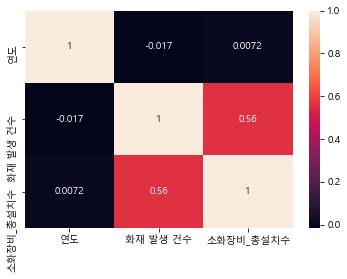

In [61]:
sns.heatmap(fire.corr(), annot=True)
plt.show()

In [66]:
fire10=pd.merge(data2,fp2, on=['자치구','연도'])
fire10.rename(columns={"소계_x":"화재발생_총건수", "소계_y":"소화장비_총설치수"}, inplace = True)
fire10.head(3)

,연도,자치구,주택,학교,일반업무,판매시설,숙박시설,종교시설,의료시설,공장 및 창고,작업장,위락오락시설,음식점,일반서비스시설,운송(차량 철도 등),임야,위험물(가스 제조소 등),기타장소,화재발생_총건수,소화장비_총설치수
0,2016,종로구,81,4,13,9,2,0,0,5,12,2,45,24,16,1,0,62,276,3137
1,2016,중구,34,3,28,11,2,0,1,6,19,1,28,5,18,0,0,54,210,2741
2,2016,용산구,69,2,14,11,4,1,1,5,2,1,32,7,19,0,0,29,197,2698


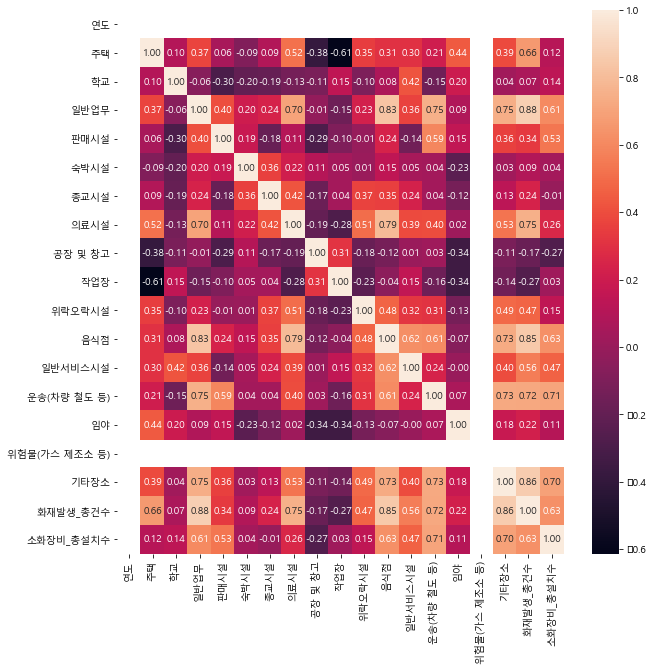

In [108]:
a=fire10[fire10['연도']==2016]
plt.figure(figsize=(10,10))
sns.heatmap(a.corr(), annot=True,fmt='.2f')    #2016년 장소와 소화설치수 상관관계
plt.show()

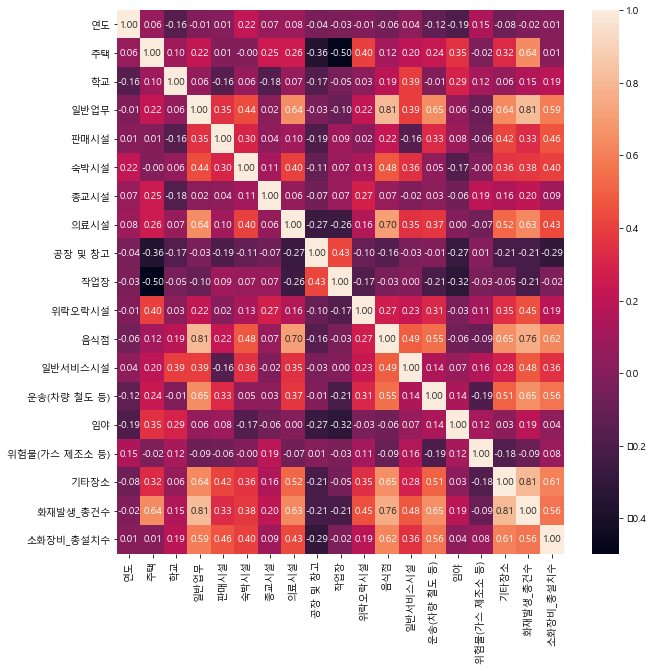

In [69]:
#2016~2018 총 화재발생장소 와 소화장비설치수 상관관계
plt.figure(figsize=(10,10))
sns.heatmap(fire10.corr(), annot=True,fmt='.2f')
plt.show() 